# The Sparks Foundation - Task 1

## Author @Talha Hafeez

In [60]:
#importing the libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
#importing the data set
df= pd.read_csv("student_scores.csv")

In [7]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [9]:
df.size

50

In [10]:
df.shape

(25, 2)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [14]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

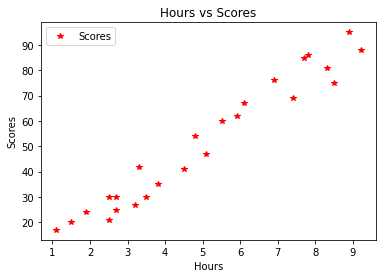

In [22]:
df.plot(x='Hours', y='Scores', style='*',color='red')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours')  
plt.ylabel('Scores')  
plt.show()

<AxesSubplot:xlabel='Hours'>

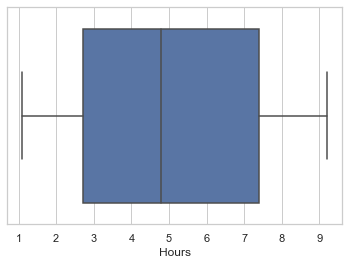

In [23]:
sns.set(style="whitegrid")
sns.boxplot(x='Hours',data=df)

<AxesSubplot:xlabel='Scores'>

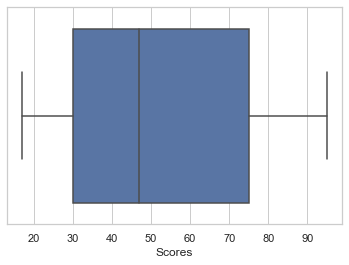

In [24]:

sns.set(style="whitegrid")
sns.boxplot(x='Scores',data=df)

C:\Users\Talha Hafeez\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

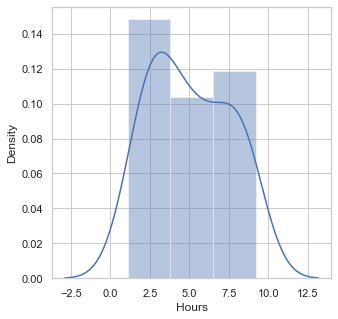

In [25]:
plt.figure(figsize=(5,5))
plt.tight_layout()
sns.distplot(df['Hours'])

C:\Users\Talha Hafeez\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

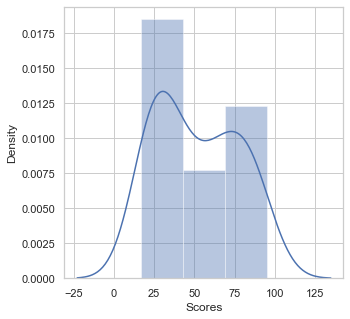

In [26]:
plt.figure(figsize=(5,5))
plt.tight_layout()
sns.distplot(df['Scores'])

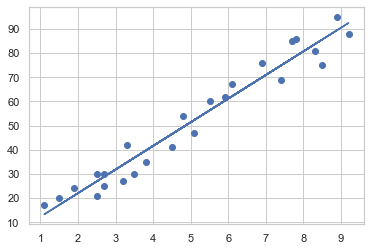

In [27]:
from scipy import stats

x = df['Hours']
y = df['Scores']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [29]:
print(r)

0.9761906560220887


In [28]:
from scipy import stats

x = df['Hours']
y = df['Scores']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

hours= myfunc(9.25)

print(hours)

92.90985477015731


In [30]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [31]:
x= df['Hours'].values
y= df['Scores'].values

In [32]:
x.shape

(25,)

In [33]:
y.shape

(25,)

In [34]:
x= df['Hours'].values.reshape(-1,1)
y= df['Scores'].values.reshape(-1,1)

In [37]:
x.shape

(25, 1)

In [38]:
y.shape

(25, 1)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [40]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) #training the algorithm

LinearRegression()

In [41]:
#To retrieve the intercept:
print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)

[2.01816004]
[[9.91065648]]


In [42]:
y_pred = regressor.predict(x_test)

In [43]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

In [44]:
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


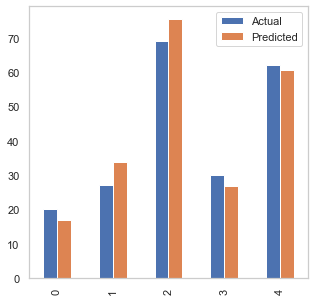

In [53]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()

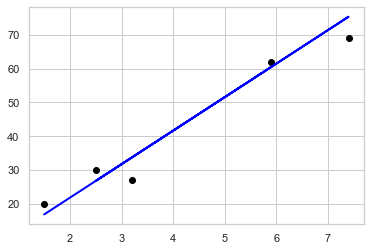

In [55]:
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=2)
plt.show()

In [56]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
